## Нагадування по Markdown

Надаємо невелике нагадування записів в
[Markdown](https://colab.research.google.com/notebooks/markdown_guide.ipynb) (LaTeX):

Markdown | Preview
--- | ---
`**bold text**` | **bold text**
 \\$\frac{x}{y}\\$ | $\frac{x}{y}$
 \\$p^{x}_{y}\\$ | $p^{x}_{y}$
\\$x \cdot y\\$ | $x \cdot y$
\\$\sqrt{x}\\$ | $\sqrt{x}$
\\$\pi\\$ | $\pi$
\\$\approx\\$ | $\approx$

І ще декілька прикладів:

```markdown
$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$
```

$y=x^2$

$e^{i\pi} + 1 = 0$

$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$

$\frac{n!}{k!(n-k)!} = {n \choose k}$

$A_{m,n} =
 \begin{pmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{m,1} & a_{m,2} & \cdots & a_{m,n}
 \end{pmatrix}$

 ---

Завдання:

$x_1$ кількість сайтів,

$x_2$ кількість інтернет-магазинів,

$x_3$ кількість іниеграцій з ERP,

Знайти:

$2x_1 + 9x_2 + 6x_3$ -> max

Обмеження:

$12x_1 + 6x_2 +2x_3 <= 320$

$12x_1 + 24x_2 +18x_3 <= 192$

$12x_1 + 18x_2 +12x_3 <= 180$

$x_1, x_2, x_3 >= 0$

Рішення:


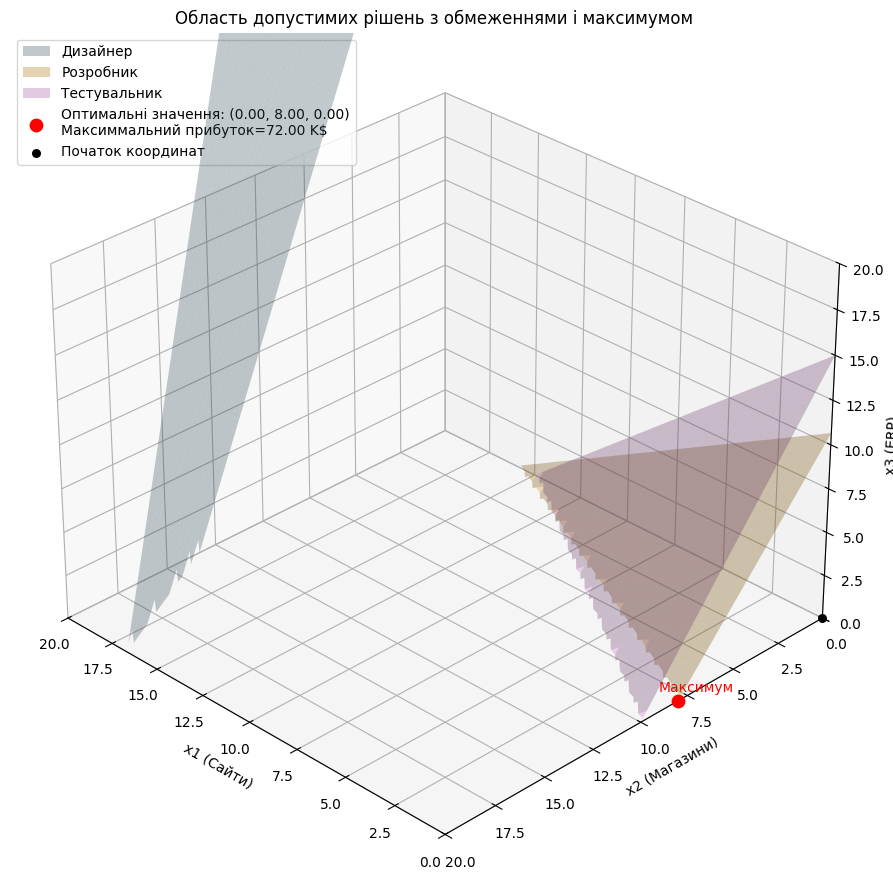

Оптимальна точка: x1 = 0.00, x2 = 8.00, x3 = 0.00
Максимальний прибуток: Z = 72.00 K$


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import linprog

# --- Цільова функція: максимізація прибутку ---
c = [-2, -9, -6]  # Z = 2x1 + 9x2 + 6x3

# --- Обмеження (Ax ≤ b)
A = [
    [12, 6, 2],     # дизайнери
    [12, 24, 18],   # розробники
    [12, 18, 12]    # тестувальники
]
b = [320, 192, 180]

bounds = [(0, None), (0, None), (0, None)]

# --- Розв’язання
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
if res.success:
    x1_opt, x2_opt, x3_opt = res.x
    total_income = -res.fun
else:
    x1_opt = x2_opt = x3_opt = total_income = None

# --- Функція для побудови обмежень ---
def build_constraint_surface(a1, a2, a3, b, x1_vals, x2_vals):
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    with np.errstate(divide='ignore', invalid='ignore'):
        X3 = (b - a1 * X1 - a2 * X2) / a3
        X3[(X3 < 0) | np.isinf(X3)] = np.nan
    return X1, X2, X3

# --- Графік ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x1_vals = np.linspace(0, 20, 100)
x2_vals = np.linspace(0, 20, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Площини обмежень
X1_d, X2_d, X3_d = build_constraint_surface(12, 6, 2, b[0], x1_vals, x2_vals)
X1_r, X2_r, X3_r = build_constraint_surface(12, 24, 18, b[1], x1_vals, x2_vals)
X1_t, X2_t, X3_t = build_constraint_surface(12, 18, 12, b[2], x1_vals, x2_vals)

# Побудова площин
ax.plot_surface(X1_d, X2_d, X3_d, alpha=0.3, color='skyblue', label='Дизайнер')
ax.plot_surface(X1_r, X2_r, X3_r, alpha=0.3, color='orange', label='Розробник')
ax.plot_surface(X1_t, X2_t, X3_t, alpha=0.3, color='violet', label='Тестувальник')

# Площина цільової функції
X3_obj = (-2 * X1 - 9 * X2) / 6
X3_obj[X3_obj < 0] = np.nan
ax.plot_surface(X1, X2, X3_obj, alpha=0.2, cmap='Greens')

# Оптимальна точка
if res.success:
    ax.scatter(x1_opt, x2_opt, x3_opt, color='red', s=80, label=f'Оптимальні значення: ({x1_opt:.2f}, {x2_opt:.2f}, {x3_opt:.2f})\nМаксиммальний прибуток={total_income:.2f} K$')
    ax.text(x1_opt + 0.5, x2_opt + 0.5, x3_opt + 0.5, 'Максимум', color='red')

# Початкова точка
ax.scatter(0, 0, 0, color='black', s=30, label='Початок координат')

# Оформлення
ax.set_xlabel('x1 (Сайти)')
ax.set_ylabel('x2 (Магазини)')
ax.set_zlabel('x3 (ERP)')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 20)
ax.view_init(elev=30, azim=135)
ax.set_title('Область допустимих рішень з обмеженнями і максимумом')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Результати
print(f"Оптимальна точка: x1 = {x1_opt:.2f}, x2 = {x2_opt:.2f}, x3 = {x3_opt:.2f}")
print(f"Максимальний прибуток: Z = {total_income:.2f} K$")


Висновки
1. Згідно графіку не використовується значний ресурс в роботі дизайнерів.
2. Вузьке місце розрахунку - ресурс Розробників.
3. На поточний момент найбільний прибуток компанія отримує від реалізації 8 інтернет-магазинів.
4. Рекомендації: 1 дизайнера перевести на комбіновану позицію: розробник - тестувальник з b = [160, 292, 240] що дозволить збільшити прибуток компанії :
Оптимальна точка: x1 = 0.00, x2 = 12.17, x3 = 0.00
Максимальний прибуток: Z = 109.50 K$

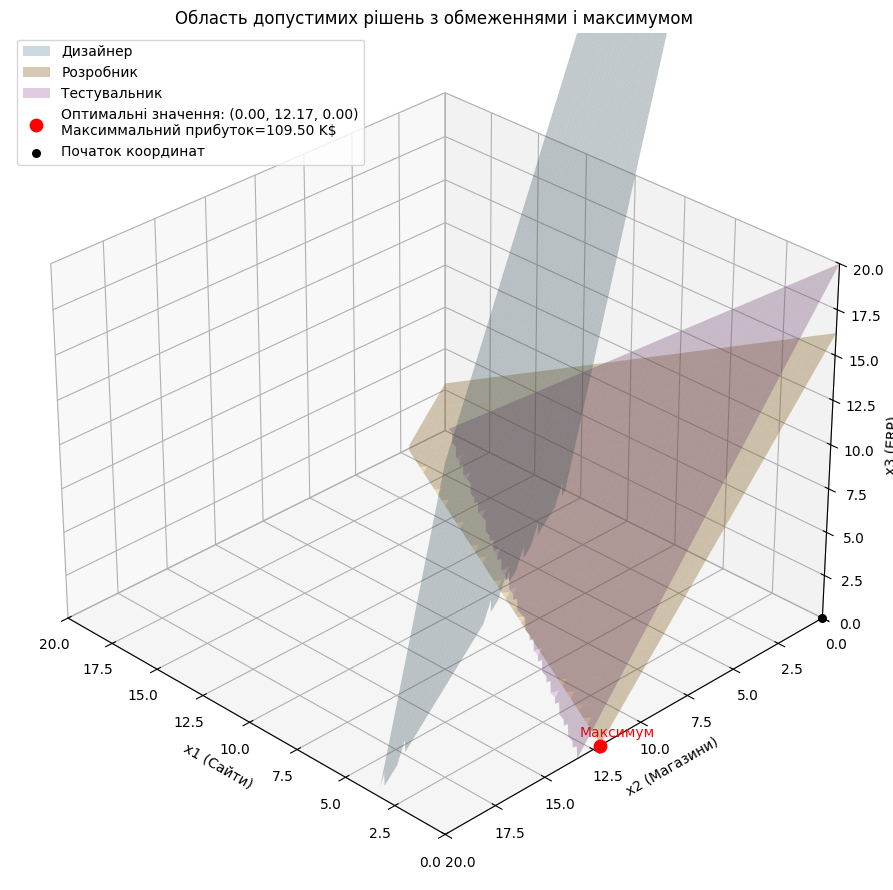

Оптимальна точка: x1 = 0.00, x2 = 12.17, x3 = 0.00
Максимальний прибуток: Z = 109.50 K$


In [5]:
# Зміни в структурі спіробітників

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import linprog

# --- Цільова функція: максимізація прибутку ---
c = [-2, -9, -6]  # Z = 2x1 + 9x2 + 6x3

# --- Обмеження (Ax ≤ b)
A = [
    [12, 6, 2],     # дизайнери
    [12, 24, 18],   # розробники
    [12, 18, 12]    # тестувальники
]
b = [160, 292, 240]

bounds = [(0, None), (0, None), (0, None)]

# --- Розв’язання
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')
if res.success:
    x1_opt, x2_opt, x3_opt = res.x
    total_income = -res.fun
else:
    x1_opt = x2_opt = x3_opt = total_income = None

# --- Функція для побудови обмежень ---
def build_constraint_surface(a1, a2, a3, b, x1_vals, x2_vals):
    X1, X2 = np.meshgrid(x1_vals, x2_vals)
    with np.errstate(divide='ignore', invalid='ignore'):
        X3 = (b - a1 * X1 - a2 * X2) / a3
        X3[(X3 < 0) | np.isinf(X3)] = np.nan
    return X1, X2, X3

# --- Графік ---
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x1_vals = np.linspace(0, 20, 100)
x2_vals = np.linspace(0, 20, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Площини обмежень
X1_d, X2_d, X3_d = build_constraint_surface(12, 6, 2, b[0], x1_vals, x2_vals)
X1_r, X2_r, X3_r = build_constraint_surface(12, 24, 18, b[1], x1_vals, x2_vals)
X1_t, X2_t, X3_t = build_constraint_surface(12, 18, 12, b[2], x1_vals, x2_vals)

# Побудова площин
ax.plot_surface(X1_d, X2_d, X3_d, alpha=0.3, color='skyblue', label='Дизайнер')
ax.plot_surface(X1_r, X2_r, X3_r, alpha=0.3, color='orange', label='Розробник')
ax.plot_surface(X1_t, X2_t, X3_t, alpha=0.3, color='violet', label='Тестувальник')

# Площина цільової функції
X3_obj = (-2 * X1 - 9 * X2) / 6
X3_obj[X3_obj < 0] = np.nan
ax.plot_surface(X1, X2, X3_obj, alpha=0.2, cmap='Greens')

# Оптимальна точка
if res.success:
    ax.scatter(x1_opt, x2_opt, x3_opt, color='red', s=80, label=f'Оптимальні значення: ({x1_opt:.2f}, {x2_opt:.2f}, {x3_opt:.2f})\nМаксиммальний прибуток={total_income:.2f} K$')
    ax.text(x1_opt + 0.5, x2_opt + 0.5, x3_opt + 0.5, 'Максимум', color='red')

# Початкова точка
ax.scatter(0, 0, 0, color='black', s=30, label='Початок координат')

# Оформлення
ax.set_xlabel('x1 (Сайти)')
ax.set_ylabel('x2 (Магазини)')
ax.set_zlabel('x3 (ERP)')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.set_zlim(0, 20)
ax.view_init(elev=30, azim=135)
ax.set_title('Область допустимих рішень з обмеженнями і максимумом')
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Результати
print(f"Оптимальна точка: x1 = {x1_opt:.2f}, x2 = {x2_opt:.2f}, x3 = {x3_opt:.2f}")
print(f"Максимальний прибуток: Z = {total_income:.2f} K$")
